# In2Research Code 2

Much like maths, once you understand how to code and run simulations you can use the same ideas to solve lots of different systems.

Now let's instead think about bacteria, which can multiply with rate $\alpha$ and that die with rate $\beta$.

The average number of living bacteria $n(t)$ varies as a function of time, but we know that there were initially $n(0)=n_{init}$ alive at $t=0$.

In this case, the average number of living bacteria follow the equation:

$$\frac{d}{dt}n(t) = \alpha - \beta \, n(t)$$

This equation can be solved to give the result:

$$n(t) = \frac{1}{\beta} \left( \alpha - \left( \alpha - \beta\,n_{init} \right) \exp(-\beta\,t) \right)$$

We can now use simulations to test this result!

The structure of the code will be the same as we used previously to study how the concentration of morphogens is distributed throughout a tissue.

First we'll define a function that will accept parameters of the simulation (including the rates $\alpha$, $\beta$ and the initial number of bacteria $n_{init}$) and use them to solve the differential equation we defined above.

In [87]:
def BacSolve(alpha, beta, nBacteriaInit, tPerStep, nt):
    
    alpha *= tPerStep;
    beta *=tPerStep;
    
    nBacteria = np.zeros(nt);
    nBacteria[0] = nBacteriaInit;
    
    for i in range(1, nt):
        
        nBacteria[i] = nBacteria[i - 1] + (alpha - (beta * nBacteria[i - 1]));
                
    return nBacteria;

Now we can run the simulation using a simpler block of code.

Try changing the input parameters "alpha", "beta" and "nBacteriaInit" to see if they affect how the average number of bacteria changes over time (the time that the simulation runs for can be changed by varying "tMax").

The plot generated by this block of code shows the result of the simulation in black and the mathematical solution we calculated above in red (dashed), do they both agree well for all sets of input parameters?

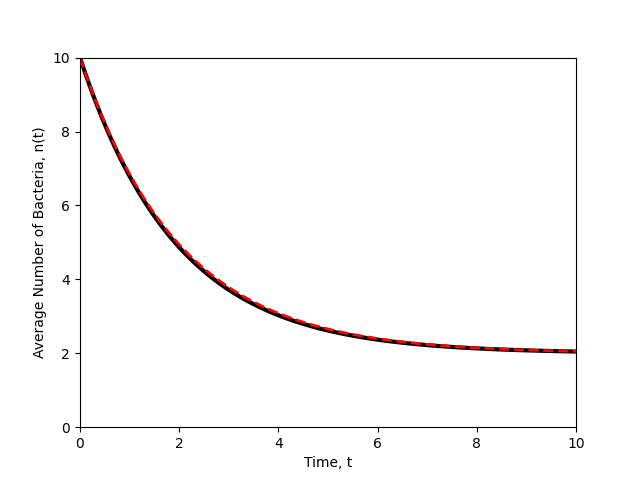

In [97]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1;
beta = 0.5;
nBacteriaInit = 10;

tPerStep = 0.1;
tMax = 10;
nt = round((tMax / tPerStep) + 1);
t = np.linspace(0, tMax, nt);

nBacteria = BacSolve(alpha, beta, nBacteriaInit, tPerStep, nt);

plt.plot(t, nBacteria, linewidth=3.0, color='black');
plt.plot(t, (1 / beta) * (alpha - (alpha - (beta * nBacteriaInit)) * np.exp(-beta * t)), linewidth=2.0, linestyle='dashed', color='red');
plt.xlabel('Time, t');
plt.xlim([0, tMax]);
plt.ylabel('Average Number of Bacteria, n(t)');
plt.ylim([0, max(nBacteria)]);
plt.show();

Now let's think about more complex bacterial growth, for example, what happens if we include competition in the system?

In this case we might expect that the death rate $\beta$ increases as the number of bacteria increases, so $\beta \propto n(t)$.

Using this idea we can define the more complicated birth and death rates that depend on the current number of bacteria $n(t)$:

$$\alpha(n(t)) = \alpha_0 \, n(t)^p, \qquad \qquad \beta(n(t)) = \beta_0 \, n(t)^q$$

This means that the equation describing how the average number of bacteria changes as a function of time becomes:

$$\frac{d}{dt}n(t) = \alpha_0 \, n(t)^p - \beta_0 \, n(t)^{q+1}$$

We can only solve this equation mathematically for specific values of $p$ and $q$, but we can solve it using simulations for any values of $p$ and $q$!

First, we need to re-define our differential equation solver so that it also accepts $p$ and $q$ as inputs.

In [98]:
def BacSolve(p, alpha0, q, beta0, nBacteriaInit, tPerStep, nt):
    
    alpha0 *= tPerStep;
    beta0 *=tPerStep;
    
    nBacteria = np.zeros(nt);
    nBacteria[0] = nBacteriaInit;
    
    for i in range(1, nt):
        
        nBacteria[i] = nBacteria[i - 1] + ((alpha0 * (nBacteria[i - 1] ** p)) - (beta0 * (nBacteria[i - 1] ** (q + 1))));
                
    return nBacteria;

Now we can simulate this more complex bacterial system with complex birth and death rates!

Try changing the powers "p" and "q" and the rate constants "alpha0" and "beta0" in the following block of code to see how different kinds of growth and death can change how the number of bacteria evolves.

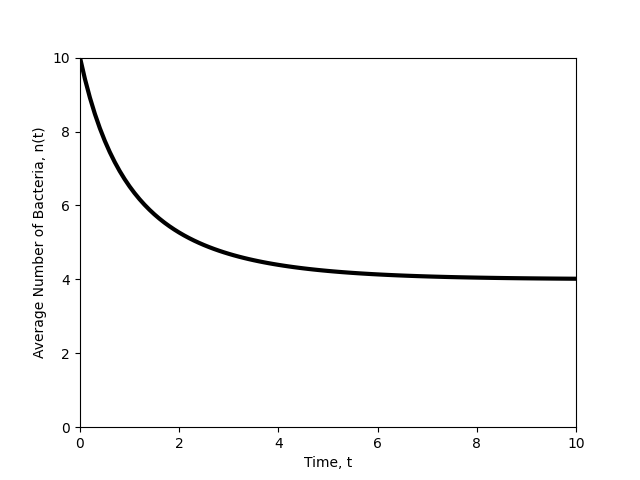

In [99]:
import numpy as np
import matplotlib.pyplot as plt

p = 1;
q = 0.5;
alpha0 = 1;
beta0 = 0.5;
nBacteriaInit = 10;

tPerStep = 0.1;
tMax = 10;
nt = round((tMax / tPerStep) + 1);
t = np.linspace(0, tMax, nt);

nBacteria = BacSolve(p, alpha0, q, beta0, nBacteriaInit, tPerStep, nt);

plt.plot(t, nBacteria, linewidth=3.0, color='black');
plt.xlabel('Time, t');
plt.xlim([0, tMax]);
plt.ylabel('Average Number of Bacteria, n(t)');
plt.ylim([0, max(nBacteria)]);
plt.show();